<a href="https://colab.research.google.com/github/mikhail-mat/statquest-illustrated-guide/blob/main/StatQuest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Trying out linear regression with my own values for x and y

In [ ]:
x = np.array([2.5, 3.2, 1.4, 8.7, 6.0, 3.4, 5.7]).reshape(-1, 1)
y = np.array([10.3, 13.1, 6.7, 17.3, 14.1, 12.7, 13.9]).reshape(-1, 1)

In [ ]:
x_train = x[:5]
y_train = y[:5]
x_test = x[5:]
y_test = y[5:]

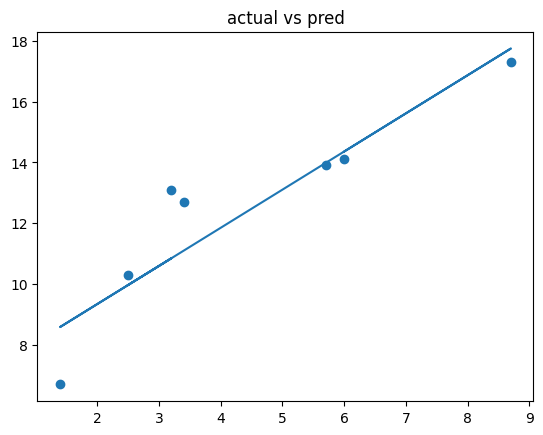

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
plt.scatter(x, y)
plt.plot(x_train, y_pred)
plt.title('actual vs pred')
plt.show()

# Linear regression manual implementation with gradient descent

In [7]:
import kagglehub

In [8]:
# Download latest version
path = kagglehub.dataset_download("tanuprabhu/linear-regression-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/tanuprabhu/linear-regression-dataset/versions/1


In [9]:
df = pd.read_csv(f'{path}/Linear Regression - Sheet1.csv')

In [10]:
df.query('X > 250 & Y < 25')

,X,Y
298,299,1.888889
299,300,1.888889


In [11]:
df = df.iloc[:298]
df.tail()

,X,Y
293,294,199.222222
294,295,199.888889
295,296,200.555556
296,297,201.222222
297,298,201.888889


In [12]:
x = df['X'].values #.reshape(-1, 1)
y = df['Y'].values #.reshape(-1, 1)

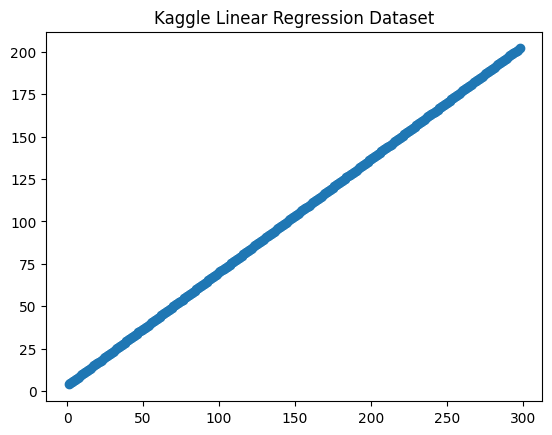

In [13]:
plt.scatter(x, y)
plt.title('Kaggle Linear Regression Dataset')
plt.show()

In [14]:
def SSR(y_real, y_pred):
  residuals = y_real - y_pred
  squared_res = np.square(residuals)
  sum = np.sum(squared_res)
  return sum

In [15]:
def MSE(SSR, num_of_obs):
  return SSR / (num_of_obs*2)

In [16]:
def R2(y_real, y_pred):
  mean_val = np.mean(y_real)
  mean_ssr = SSR(y_real, mean_val)
  pred_ssr = SSR(y_real, y_pred)
  return (mean_ssr - pred_ssr) / mean_ssr

In [17]:
def predict(x, w1, b):
  y_pred = w1 * x + b

In [77]:
def gradient_descent(x, y, epochs=100, lr=1.0e-5):
  n = np.size(y) # size of the feature and label vector

  # initialise w1 and b to 0
  w1 = 0
  b = 0

  # w1_step = -1
  # b_step = -1

  cost_history = [] # keep track of cost as it is reducing

  for i in range(epochs): # perform 100 epochs
    y_pred = w1 * x + b # calculate vector of predicted y with current w1 and b
    residual = y_pred - y # vector of residuals

    # calculate derivatives
    dj_dw1 = np.sum(np.dot(x, residual)) / n
    dj_db = np.sum(residual) / n

    # debug
    # print(f'w1 = {w1}')
    # print(f'b = {b}')
    # print(f'Predicted y = {y_pred[0]} {y_pred[1]} {y_pred[2]}')
    # print(f'Residual = {residual[0]} {residual[1]} {residual[2]}')
    # print(f'dJ/dw1 = {dj_dw1}')
    # print(f'dJ/db = {dj_db}')

    # update parameters
    w1 -= dj_dw1 * lr
    b -= dj_db * lr

    # add cost to cost_history
    cost_history.append(MSE(SSR(y, y_pred), n))

  return w1, b, cost_history

In [78]:
w1, b, cost_history = gradient_descent(x, y)

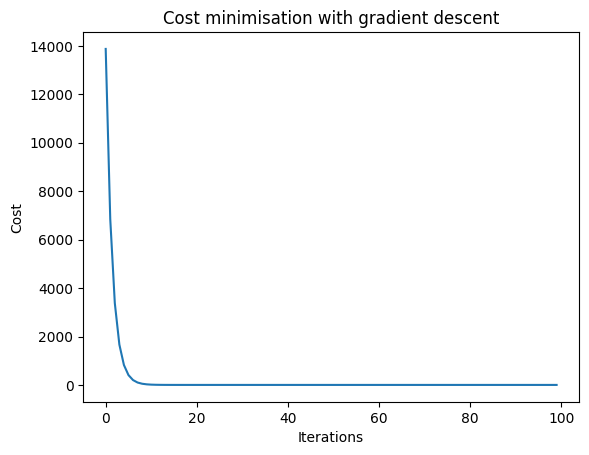

In [82]:
plt.plot(np.arange(100), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost minimisation with gradient descent')
plt.show()

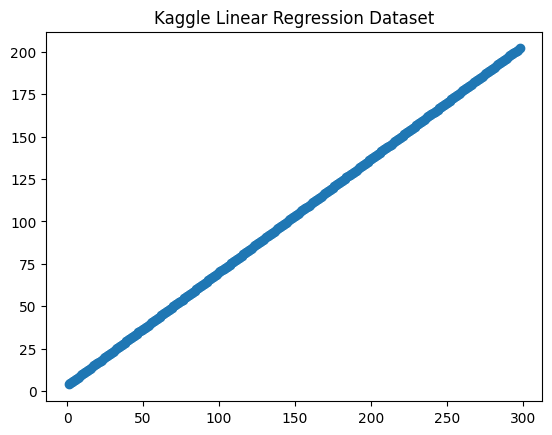

In [21]:
y_pred = w1 * x + b
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.title('Kaggle Linear Regression Dataset')
plt.show()

In [22]:
model = LinearRegression()

In [23]:
def k_fold_cross_val(k, df, model):
  # randomize the order of the data
  data = df.to_numpy()
  np.random.shuffle(data)

  # split the data into k equal groups
  k_folds = np.array_split(data, k)

  # iteratively select k-1 groups to be the training data and the one group
  # that is left to be the testing data
  mse_history = []
  r2_history = []

  for fold in range(len(k_folds)):
    x_test = k_folds[fold][:, 0].reshape(-1, 1)
    y_test = k_folds[fold][:, 1].reshape(-1, 1)

    parts = k_folds[:fold] + k_folds[fold+1:]
    x_train = np.vstack(parts)[:, 0].reshape(-1, 1)
    y_train = np.vstack(parts)[:, 1].reshape(-1, 1)

    # train the model using the training data
    model.fit(x_train, y_train)

    # evaluate using the testing data
    y_pred = model.predict(x_test)
    mse = MSE(SSR(y_test, y_pred), np.size(y_test))
    r2 = R2(y_test, y_pred)

    # keep track of the entire history of evaluations for the model
    mse_history.append(mse)
    r2_history.append(r2)

  # return the evaluation history
  return mse_history, r2_history

cv_mse, cv_r2 = k_fold_cross_val(10, df, model)

In [24]:
print(f'mean MSE after CV: {np.mean(cv_mse)}')
print(f'mean R2 after CV: {np.mean(cv_r2)}')

mean MSE after CV: 3.9615344220804875e-16
mean R2 after CV: 1.0
